<a href="https://colab.research.google.com/github/Aravinda89/fastai_bootcamp/blob/main/BC2_1_MNIST_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
from fastai.vision.all import *
from fastbook import *
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle

matplotlib.rc('image', cmap='Greys')

In [4]:
#Load full MNIST dataset

path = untar_data(URLs.MNIST)    # Full dataset (0s to 9s)
Path.BASE_PATH = path

In [5]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [6]:
(path/'training').ls()

(#10) [Path('training/2'),Path('training/3'),Path('training/8'),Path('training/5'),Path('training/6'),Path('training/4'),Path('training/0'),Path('training/1'),Path('training/7'),Path('training/9')]

In [7]:
len((path/'training/5').ls())

5421

In [8]:
paths_dict = {}         # Create an empty dictionary to hold the paths list for each digit
num_imgs_dict = {}        # Number of images for each class

for i in range(10):
    paths_dict[i] = (path/'training'/f"{i}").ls().sorted()   # add the list of path for digit i to the dict
    num_imgs_dict[i] = len((path/'training'/f"{i}").ls())   # Get number of images for each class

paths_dict

{0: (#5923) [Path('training/0/1.png'),Path('training/0/1000.png'),Path('training/0/10005.png'),Path('training/0/10010.png'),Path('training/0/10022.png'),Path('training/0/10025.png'),Path('training/0/10026.png'),Path('training/0/10045.png'),Path('training/0/10069.png'),Path('training/0/10071.png')...],
 1: (#6742) [Path('training/1/10006.png'),Path('training/1/10007.png'),Path('training/1/1002.png'),Path('training/1/10020.png'),Path('training/1/10027.png'),Path('training/1/1003.png'),Path('training/1/10040.png'),Path('training/1/10048.png'),Path('training/1/10058.png'),Path('training/1/10067.png')...],
 2: (#5958) [Path('training/2/10009.png'),Path('training/2/10016.png'),Path('training/2/10024.png'),Path('training/2/10029.png'),Path('training/2/10072.png'),Path('training/2/10073.png'),Path('training/2/10075.png'),Path('training/2/10078.png'),Path('training/2/10081.png'),Path('training/2/10082.png')...],
 3: (#6131) [Path('training/3/10.png'),Path('training/3/10000.png'),Path('training/

In [9]:
for i in range(10):
    img_paths = paths_dict[i][10]
    img = Image.open(img_paths)
    display(img)

In [10]:
# Number of images for each class
num_imgs_dict

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

([<matplotlib.axis.XTick at 0x7f4d5a8e7510>,
 <a list of 10 Text major ticklabel objects>)

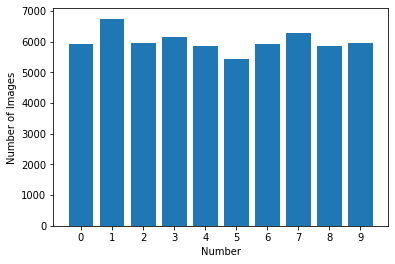

In [11]:
plt.bar(num_imgs_dict.keys(), num_imgs_dict.values(), label="Distribution")
plt.ylabel ('Number of Images')
plt.xlabel ('Number')
plt.xticks(list(num_imgs_dict.keys()))

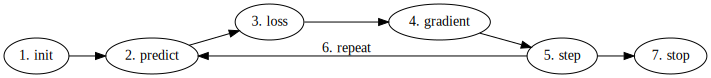

In [12]:
# Stochastic Gradient Descent (SGD)
gv('''
"1. init"->"2. predict"->"3. loss"->"4. gradient"->"5. step"->"7. stop"
"5. step"->"2. predict"[label="6. repeat"]
''')

In [ ]:
# Prepare datasets and dataloaders

In [13]:
paths_dict

{0: (#5923) [Path('training/0/1.png'),Path('training/0/1000.png'),Path('training/0/10005.png'),Path('training/0/10010.png'),Path('training/0/10022.png'),Path('training/0/10025.png'),Path('training/0/10026.png'),Path('training/0/10045.png'),Path('training/0/10069.png'),Path('training/0/10071.png')...],
 1: (#6742) [Path('training/1/10006.png'),Path('training/1/10007.png'),Path('training/1/1002.png'),Path('training/1/10020.png'),Path('training/1/10027.png'),Path('training/1/1003.png'),Path('training/1/10040.png'),Path('training/1/10048.png'),Path('training/1/10058.png'),Path('training/1/10067.png')...],
 2: (#5958) [Path('training/2/10009.png'),Path('training/2/10016.png'),Path('training/2/10024.png'),Path('training/2/10029.png'),Path('training/2/10072.png'),Path('training/2/10073.png'),Path('training/2/10075.png'),Path('training/2/10078.png'),Path('training/2/10081.png'),Path('training/2/10082.png')...],
 3: (#6131) [Path('training/3/10.png'),Path('training/3/10000.png'),Path('training/

In [14]:
# Open images in each class , create tensor dict
tensors_dict = {}

for i in range(10):
    tensors_dict[i] = [tensor(Image.open(o)) for o in paths_dict[i]]

In [15]:
tensors_dict[0][0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 227, 253, 252, 239, 2

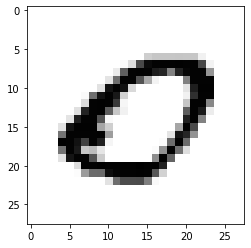

In [16]:
plt.imshow( tensors_dict[0][0].permute(1, 0))

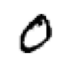

In [17]:
show_image(tensors_dict[0][0])

In [18]:
tensors_dict[0][0].shape

torch.Size([28, 28])

In [19]:
# Calculate the stacked tensor for each of the digit and store that tensor in a dictionary index by digit
stacked_tensors_dict = {}

for digit, img_tensor in tensors_dict.items():
    stacked_tensors_dict[digit] = torch.stack(img_tensor).float()/255

In [20]:
stacked_tensors_dict[0].shape

torch.Size([5923, 28, 28])

In [21]:
train_x = torch.cat([stacked_tensors_dict[i] for i in range(0,10)]).view(-1, 28*28)

In [22]:
train_x.shape

torch.Size([60000, 784])

In [23]:
stacked_tensors_dict[0].shape

torch.Size([5923, 28, 28])

In [24]:
stacked_tensors_dict[0].shape[0]

5923

In [25]:
# Returns a list of 10 sublists, where each sublist consists of as many times digit as the number of image in the category
l = [ [i] * stacked_tensors_dict[i].shape[0] for i in range(0,10) ]

# check the the total number of labels is equal to the numer of images
assert sum([len(sublist) for sublist in l]) == train_x.shape[0]

In [26]:
# Create a tensor based on the list of labels

label_list = []

for i in range(10):
    label_list.extend(l[i])

assert len(label_list) == train_x.shape[0]

In [27]:
train_y = torch.tensor(label_list).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

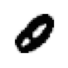

In [28]:
show_image(train_x[5].view(-1, 28,28))

In [29]:
train_y[0]

tensor([0])

In [30]:
dset = list(zip(train_x, train_y))

# Shuffle the dset so that digits are mixed
shuffle(dset)

In [31]:
x, y = dset[0]

In [32]:
x.shape

torch.Size([784])

In [33]:
y.shape

torch.Size([1])

In [34]:
stacked_tensors_dict[0].shape

torch.Size([5923, 28, 28])

In [35]:
valid_tensors_dict = {}

for digit, tnrs in stacked_tensors_dict.items():
  
    valid_tensors_dict[digit] = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/f"{digit}").ls()])
    valid_tensors_dict[digit] = valid_tensors_dict[digit].float()/255

    print('shape for',digit, ':', valid_tensors_dict[digit].shape)

shape for 0 : torch.Size([980, 28, 28])
shape for 1 : torch.Size([1135, 28, 28])
shape for 2 : torch.Size([1032, 28, 28])
shape for 3 : torch.Size([1010, 28, 28])
shape for 4 : torch.Size([982, 28, 28])
shape for 5 : torch.Size([892, 28, 28])
shape for 6 : torch.Size([958, 28, 28])
shape for 7 : torch.Size([1028, 28, 28])
shape for 8 : torch.Size([974, 28, 28])
shape for 9 : torch.Size([1009, 28, 28])


In [36]:
valid_tensors_dict[0].shape

torch.Size([980, 28, 28])

In [37]:
valid_x = torch.cat([valid_tensors_dict[i] for i in range(0,10)]).view(-1, 28*28)

In [38]:
# Returns a list of 10 sublists, where each sublist consists of a as many times digit as the number of image in the category
l = [ [i] * valid_tensors_dict[i].shape[0] for i in range(0,10)]

In [39]:
# check the the total number of labels is equal to the numer of images
assert sum([len(sublist) for sublist in l]) == valid_x.shape[0] 
print(valid_x.shape)

torch.Size([10000, 784])


In [40]:
# Create a tensor based on the list of labels

label_list = []

for i in range(10):
    label_list.extend(l[i])
assert len(label_list) == valid_x.shape[0]

valid_y = torch.tensor(label_list).unsqueeze(1)
print(valid_y.shape)

valid_dset = list(zip(valid_x, valid_y))

torch.Size([10000, 1])


In [46]:
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=5)

In [42]:
def init_params(size, std=1.0): 
    return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28, 10))
bias = init_params(10)

weights.shape, bias.shape

(torch.Size([784, 10]), torch.Size([10]))

In [44]:
def linear(xb):
    outputs =  xb @ weights + bias
    probs = F.log_softmax(outputs, dim=1)
    return probs

def evaluate_preds(xb):
    probs = linear(xb)
    return probs.argmax(dim=1).unsqueeze(dim=1)

loss_fct = F.nll_loss

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = loss_fct(preds, yb.squeeze())
    loss.backward()

def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)

        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

def batch_accuracy(xb, yb):
    """Determines how many of the predictions are actually correct"""
    accuracy = torch.eq(xb, yb).sum() / xb.shape[0]
    return accuracy

def validate_epoch(model):
    """Collects the accuracy from each element in the dataloader and displays it"""
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)


In [47]:
weights = init_params((28*28, 10))
bias = init_params(10)

params = weights, bias

lr = 1

train_epoch(linear, lr, params)

validate_epoch(evaluate_preds)

0.847

In [48]:
n_epochs = 20

for i in range(n_epochs):
    train_epoch(linear, lr, params)

    if i%10 == 0:
        print(f"{i}:{validate_epoch(evaluate_preds):1.4f}", end=' ')
        
print(validate_epoch(evaluate_preds))

0:0.8682 10:0.9022 0.9101


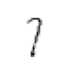

tensor([[7]])

In [50]:
img = valid_tensors_dict[7][957]
show_image(img)
plt.show()

evaluate_preds(img.view(28*28).unsqueeze(dim=0))

In [51]:
# ReLu and two layers

In [52]:
def init_params(size, std=1.0): 
  return (torch.randn(size)*std).requires_grad_()

w1 = init_params((28*28, 100))
b1 = init_params(100)

w2 = init_params((100, 10))
b2 = init_params(10)

w1.shape, b1.shape, w2.shape, b2.shape

(torch.Size([784, 100]),
 torch.Size([100]),
 torch.Size([100, 10]),
 torch.Size([10]))

In [58]:
activ1 = nn.ReLU()

def linear1(xb):
    outputs =  xb @ w1 + b1
    return activ1(outputs)

def linear2(xb):
    outputs =  xb @ w2 + b2
    probs = F.log_softmax(outputs, dim=1)
    return probs

def model(xb):
    xb = linear1(xb)
    xb = linear2(xb)
    return xb

def classifier(xb):
    xb = model(xb)
    return xb.argmax(dim=1).unsqueeze(dim=1)

loss_fct = F.nll_loss

In [59]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = loss_fct(preds, yb.squeeze())
    # print(loss)
    loss.backward()

def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

#Determines how many of the predictions are actually correct 
def batch_accuracy(xb, yb):
    accuracy = torch.eq(xb, yb).sum() / xb.shape[0]
    return accuracy

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

from math import log10

def run_n_epochs(model, lr, params, n_epochs):
    trigger = 10**(int(log10(n_epochs))-1)
    cols = 10
    starting_i = metric_results['epochs'][-1] + 1
    for i in range(starting_i, starting_i + n_epochs):
        train_epoch(model, lr, params)
        if i%trigger == 0:
            v = validate_epoch(classifier)

            metric_results['epochs'].append(i)
            metric_results['values'].append(v)
            
            end_str = '\n' if i//trigger%cols == 0 else ' ' 
            print(f"{i:3d}:{v:1.4f}", end=end_str)
    print(f"\nLast:{v:1.4f}")
    fig, ax = plt.subplots(1, 1, figsize=(12,4))
    ax.scatter(metric_results['epochs'], metric_results['values'])
    return metric_results

In [60]:
shuffle(dset)
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=5)

w1 = init_params((28*28, 100))
b1 = init_params(100)
w2 = init_params((100, 10))
b2 = init_params(10)

lr = 1
params = w1, b1, w2, b2

metric_results = {}
metric_results['epochs'] = [0]
metric_results['values'] = [0]

train_epoch(model, lr, params)
validate_epoch(classifier)

0.766

  1:0.8292   2:0.8440   3:0.8612   4:0.8698   5:0.8713   6:0.8719   7:0.8779   8:0.8843   9:0.8902  10:0.8926
 11:0.8963  12:0.9000  13:0.9032  14:0.9058  15:0.9085  16:0.9109  17:0.9143  18:0.9168  19:0.9221  20:0.9246

Last:0.9246


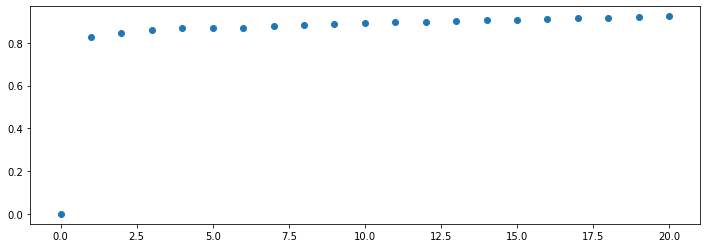

In [61]:
metric_results = run_n_epochs(model, lr, params, 20)

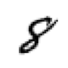

tensor([[8]])

In [62]:
img = valid_tensors_dict[8][49]
show_image(img)
plt.show()
classifier(img.view(28*28).unsqueeze(dim=0))

In [63]:
# Improvement 2 model by introducing ReLu and three layers

In [64]:
def init_params(size, std=1.0): 
    return (torch.randn(size)*std).requires_grad_()

w1 = init_params((28*28, 250))
b1 = init_params(250)

w2 = init_params((250, 100))
b2 = init_params(100)

w3 = init_params((100, 10))
b3 = init_params(10)

w1.shape, b1.shape, w2.shape, b2.shape, w3.shape, b3.shape

(torch.Size([784, 250]),
 torch.Size([250]),
 torch.Size([250, 100]),
 torch.Size([100]),
 torch.Size([100, 10]),
 torch.Size([10]))

In [65]:
activ1 = nn.ReLU()

def linear1(xb):
    outputs =  xb @ w1 + b1
    return activ1(outputs)

def linear2(xb):
    outputs =  xb @ w2 + b2
    return activ1(outputs)

def linear3(xb):
    """https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.log_softmax"""
    outputs =  xb @ w3 + b3
    probs = torch.log_softmax(outputs, dim=1)
    return probs

def model(xb):
    xb = linear1(xb)
    xb = linear2(xb)
    xb = linear3(xb)
    return xb

def classifier(xb):
    xb = model(xb)
    return xb.argmax(dim=1).unsqueeze(dim=1)


In [66]:
loss_fct = F.nll_loss

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = loss_fct(preds, yb.squeeze())
    # print(loss)
    loss.backward()

def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

def batch_accuracy(xb, yb):
    accuracy = torch.eq(xb, yb).sum() / xb.shape[0]
    return accuracy

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [67]:
from math import log10

def run_n_epochs(model, lr, params, n_epochs):
    trigger = 10**(int(log10(n_epochs))-1)
    cols = 10
    starting_i = metric_results['epochs'][-1] + 1
    for i in range(starting_i, starting_i + n_epochs):
        train_epoch(model, lr, params)
        if i%trigger == 0:
            v = validate_epoch(classifier)

            metric_results['epochs'].append(i)
            metric_results['values'].append(v)
            
            end_str = '\n' if i//trigger%cols == 0 else ' ' 
            print(f"{i:3d}:{v:1.4f}", end=end_str)
    print(f"\nLast:{v:1.4f}")
    fig, ax = plt.subplots(1, 1, figsize=(12,4))
    ax.scatter(metric_results['epochs'], metric_results['values'])
    return metric_results

In [68]:
shuffle(dset)
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=5)

w1 = init_params((28*28, 250))
b1 = init_params(250)
w2 = init_params((250, 100))
b2 = init_params(100)
w3 = init_params((100, 10))
b3 = init_params(10)

lr = 1
params = w1, b1, w2, b2

metric_results = {}
metric_results['epochs'] = [0]
metric_results['values'] = [0]

train_epoch(model, lr, params)
validate_epoch(classifier)

0.1438

  1:0.1804   2:0.2528   3:0.2394   4:0.2987   5:0.3327   6:0.3349   7:0.3250   8:0.3445   9:0.3394  10:0.3477
 11:0.3347  12:0.3771  13:0.4138  14:0.4160  15:0.4772  16:0.4813  17:0.5302  18:0.5277  19:0.5254  20:0.5260

Last:0.5260


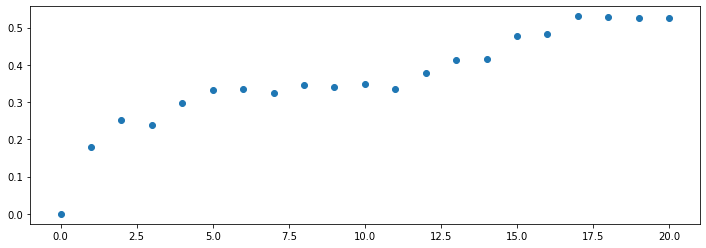

In [69]:
metric_results = run_n_epochs(model, lr, params, 20)
